In [27]:
import pandas as pd
import numpy as np

**Importing dataset**

In [28]:
df=pd.read_csv("/content/processed_insurance_dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


There are no null values in the data

In [32]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Function for finding minimum cost for each feature using gradient descent

In [39]:
def gradient_descent_single_feature(x, y, lr=0.01, epochs=3000):
    # Normalize x
    x = (x - x.mean()) / x.std()

    # Add bias
    X = np.c_[np.ones(len(x)), x]

    # Scale y
    y_mean, y_std = y.mean(), y.std()
    y_scaled = (y - y_mean) / y_std

    # Initialize weights
    w = np.zeros(2)
    n = len(y)

    losses = []

    for _ in range(epochs):
        y_pred = X.dot(w)
        error = y_pred - y_scaled

        grad = (2/n) * X.T.dot(error)
        w -= lr * grad

        loss = np.mean(error**2)
        losses.append(loss)

    return losses, w


computing minimum cost of each feature

In [40]:
features = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
loss_dict = {}

for f in features:
    losses, _ = gradient_descent_single_feature(df[f].values, df['charges'].values)
    loss_dict[f] = losses[-1]  # final loss (global minimum)


minimum cost of each feature

In [41]:
for feature, loss in loss_dict.items():
    print(f"{feature} → Final MSE: {loss:.4f}")


age → Final MSE: 0.9106
bmi → Final MSE: 0.9607
children → Final MSE: 0.9954
sex → Final MSE: 0.9967
smoker → Final MSE: 0.3802
region → Final MSE: 1.0000


FEATURE SELECTION

since the feature **smoker** has minimum MSE so this would be best feature for the model

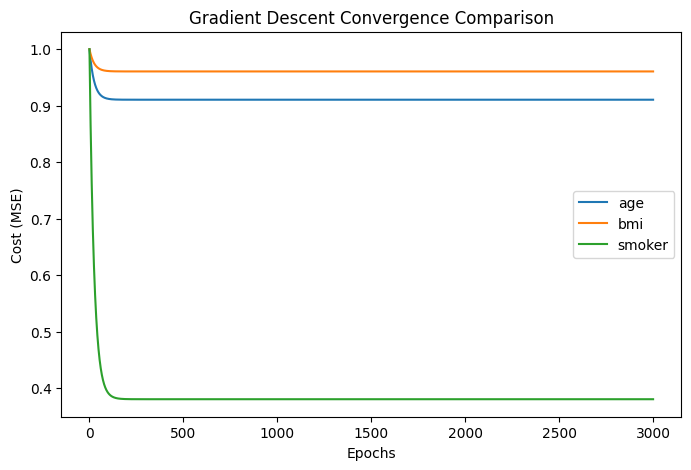

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
for f in ['age', 'bmi', 'smoker']:
    losses, _ = gradient_descent_single_feature(df[f].values, df['charges'].values)
    plt.plot(losses, label=f)

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence Comparison")
plt.legend()
plt.show()


loss on learning rate

In [44]:
for lr in [0.1, 0.01, 0.001]:
    losses, _ = gradient_descent_single_feature(df['smoker'].values, df['charges'].values, lr=lr)
    print(f"LR {lr} → Final Loss {losses[-1]:.4f}")


LR 0.1 → Final Loss 0.3802
LR 0.01 → Final Loss 0.3802
LR 0.001 → Final Loss 0.3802


loss on different Epochs

In [45]:
for e in [500, 1000, 3000]:
    losses, _ = gradient_descent_single_feature(df['bmi'].values, df['charges'].values, epochs=e)
    print(f"Epochs {e} → Final Loss {losses[-1]:.4f}")


Epochs 500 → Final Loss 0.9607
Epochs 1000 → Final Loss 0.9607
Epochs 3000 → Final Loss 0.9607


In [47]:
def compute_cost_theta(x, y, theta0, theta1):
    n = len(y)
    y_pred = theta0 + theta1 * x
    return np.mean((y_pred - y) ** 2)


In [48]:
# Select feature
x = df['smoker'].values
y = df['charges'].values

# Normalize x
x = (x - x.mean()) / x.std()

# Scale y
y = (y - y.mean()) / y.std()


In [49]:
theta1_values = np.linspace(-2, 2, 200)
cost_values = []

theta0 = 0  # keep bias fixed


In [50]:
for t1 in theta1_values:
    cost = compute_cost_theta(x, y, theta0, t1)
    cost_values.append(cost)


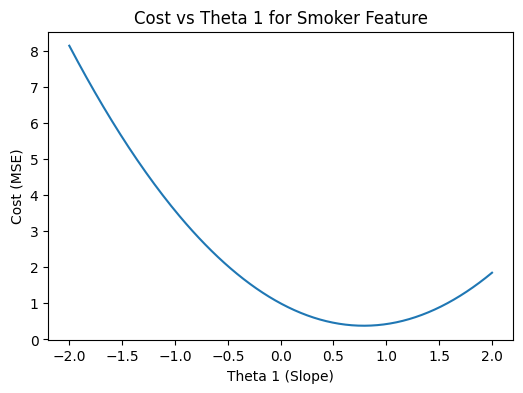

In [51]:
plt.figure(figsize=(6,4))
plt.plot(theta1_values, cost_values)
plt.xlabel("Theta 1 (Slope)")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Theta 1 for Smoker Feature")
plt.show()
